In [334]:
# import libraries
# MIT License

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

from scipy import stats
from sklearn.metrics import silhouette_score

### Deal with unbalanced data
### https://www.analyticsvidhya.com/blog/2020/10/overcoming-class-imbalance-using-smote-techniques/

### K-Nearest Neighbor OveRsampling approach: https://www.sciencedirect.com/science/article/pii/S1568494621010942

### Online learning:
### https://www.sciencedirect.com/topics/physics-and-astronomy/weight-vector

### statsmodel p-value -> feature selection

In [335]:
df = pd.read_csv("../data/cleaned_data.csv")

In [336]:
df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,Repayment_Status_May,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Pay_Amount_Sept,Pay_Amount_Aug,Pay_Amount_Jul,Pay_Amount_Jun,Pay_Amount_May,Pay_Amount_Apr,Default_Payment
0,20000,2,3,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,3,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,3,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,3,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,3,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [337]:
# check the range of limit balance
df['LIMIT_BAL'].describe()

count      30000.000000
mean      167484.322667
std       129747.661567
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

In [338]:
# show the unique values of limit balance
df['LIMIT_BAL'].unique()

array([  20000,  120000,   90000,   50000,  500000,  100000,  140000,
        200000,  260000,  630000,   70000,  250000,  320000,  360000,
        180000,  130000,  450000,   60000,  230000,  160000,  280000,
         10000,   40000,  210000,  150000,  380000,  310000,  400000,
         80000,  290000,  340000,  300000,   30000,  240000,  470000,
        480000,  350000,  330000,  110000,  420000,  170000,  370000,
        270000,  220000,  190000,  510000,  460000,  440000,  410000,
        490000,  390000,  580000,  600000,  620000,  610000,  700000,
        670000,  680000,  430000,  550000,  540000, 1000000,  530000,
        710000,  560000,  520000,  750000,  640000,   16000,  570000,
        590000,  660000,  720000,  327680,  740000,  800000,  760000,
        690000,  650000,  780000,  730000])

In [339]:
# make function looks nicer
def data_summary(df, interactive=False):
    """
    
    Prints a summary of the given DataFrame.

    Parameters:
    df (pd.DataFrame): The DataFrame to summarize.
    interactive (bool): If True, pauses after each summary part and clears the screen. Default is False.

    Returns:
    dict: A dictionary containing various summary information of the DataFrame.
    """
    hashtable = {
        "Data shape": df.shape,
        "Data columns": df.columns.to_list(),
        "Data types": df.dtypes.to_dict(),
        "Data describe": df.describe().to_string(),
        "Data null count": df.isnull().sum().to_dict(),
        "Data Count": df.count().to_dict()
    }

    for key, value in hashtable.items():
        print(f"{key}:\n{value}\n")
        if interactive:
            input("Press Enter to continue...")
            os.system('cls' if os.name == 'nt' else 'clear')
            
    return None

In [340]:
# check if the data is clean enough
def check_data(df):
    return df.isnull().sum()

# check if the the range of each column, not include the first row
def check_range(df):
    for col in df.columns:
        print(col, df[col].unique())

EDUCATION
-1    0.070513
 1    0.192348
 2    0.251576
 3    0.237349
Name: Default_Payment, dtype: float64


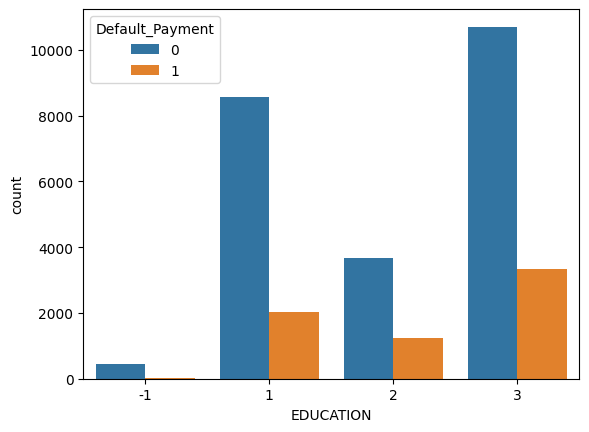

MARRIAGE
-1    0.236074
 1    0.234717
 2    0.209283
Name: Default_Payment, dtype: float64


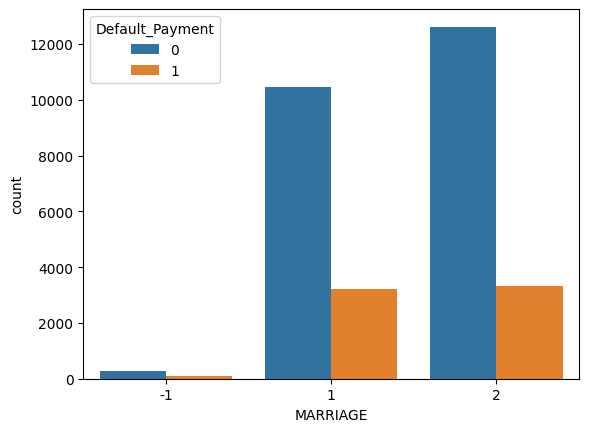

In [341]:
# check if the eduction related to the default payment and visualize it
# calcualte the p value
def check_edu(df):
    # show percentage of user is default:
    print(df.groupby('EDUCATION')['Default_Payment'].mean())
    sns.countplot(x='EDUCATION', hue='Default_Payment', data=df)
    plt.show()

# check marriage status related to the default payment and visualize it
def check_marriage(df):
    # show percentage of default payment
    print(df.groupby('MARRIAGE')['Default_Payment'].mean())
    sns.countplot(x='MARRIAGE', hue='Default_Payment', data=df)
    plt.show()
check_edu(df)
check_marriage(df)

<Axes: title={'center': 'Correlation Matrix'}>

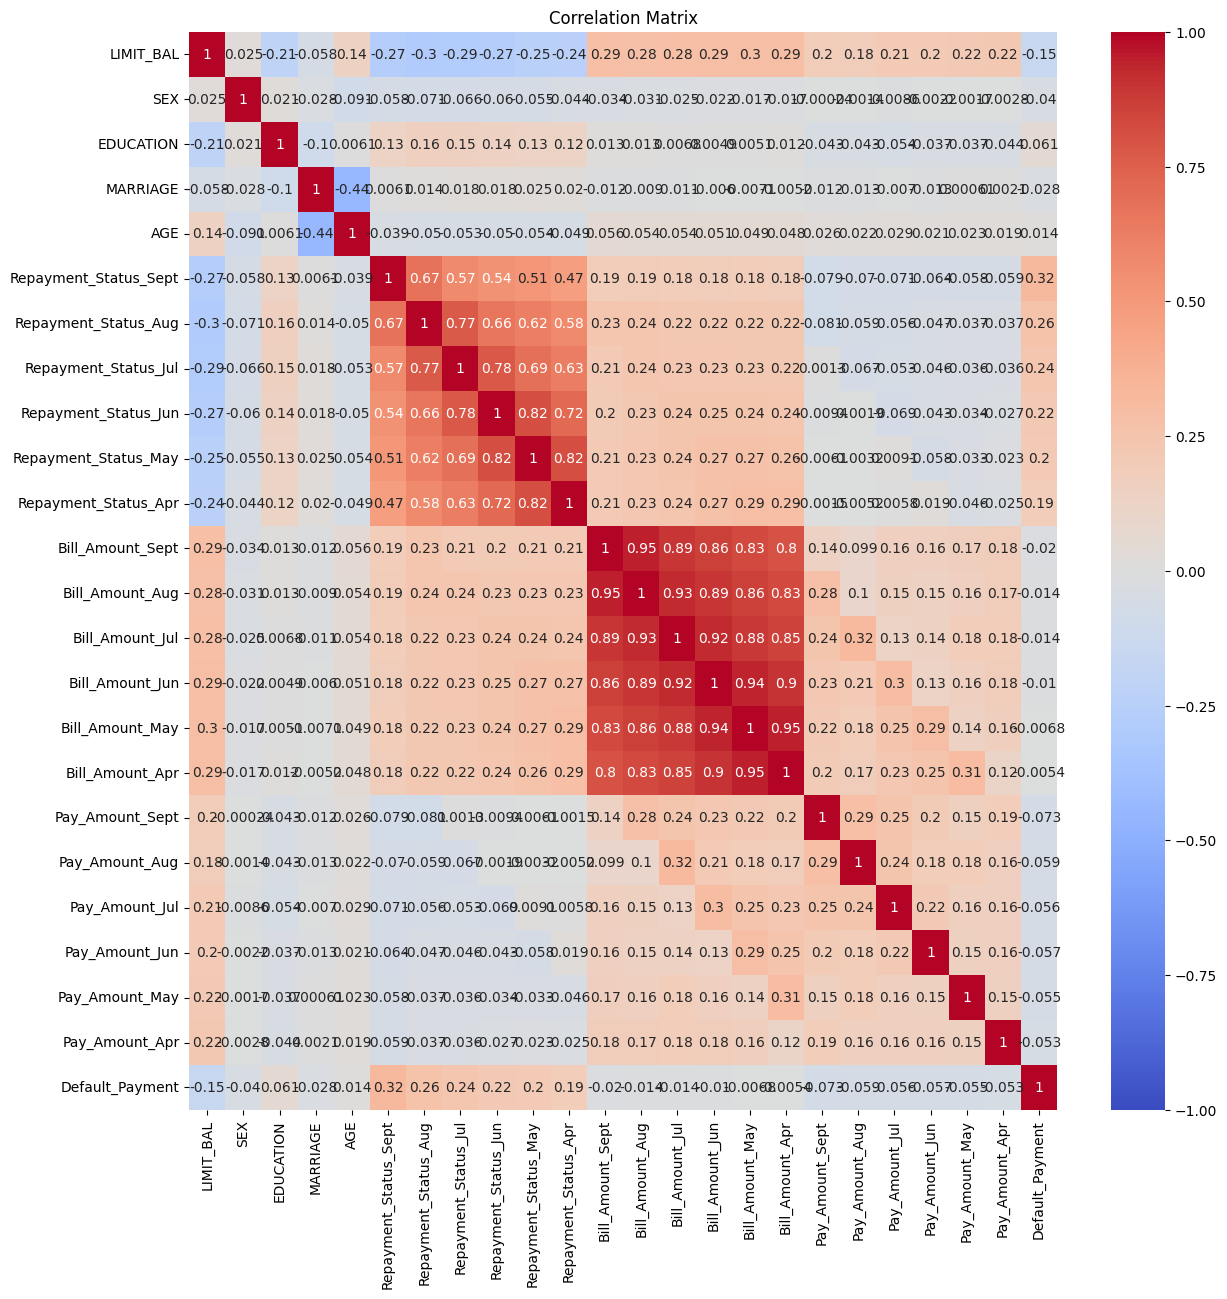

In [342]:
# check the correlation between each column
corr = df.corr()
plt.figure(figsize=(14, 14))
plt.title('Correlation Matrix')
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm')

In [343]:
df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,Repayment_Status_Sept,Repayment_Status_Aug,Repayment_Status_Jul,Repayment_Status_Jun,Repayment_Status_May,...,Bill_Amount_Jun,Bill_Amount_May,Bill_Amount_Apr,Pay_Amount_Sept,Pay_Amount_Aug,Pay_Amount_Jul,Pay_Amount_Jun,Pay_Amount_May,Pay_Amount_Apr,Default_Payment
0,20000,2,3,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
1,120000,2,3,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,2,3,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,2,3,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,3,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,220000,1,2,1,39,0,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,150000,1,2,2,43,-1,-1,-1,-1,0,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,30000,1,3,2,37,4,3,2,-1,0,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,80000,1,2,1,41,1,-1,0,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


# Classification: Check the p-value to the regarding features

/var/folders/20/0y46cgg97gs8kf_s9bthlzgm0000gn/T/ipykernel_55598/3970577539.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AGE'])


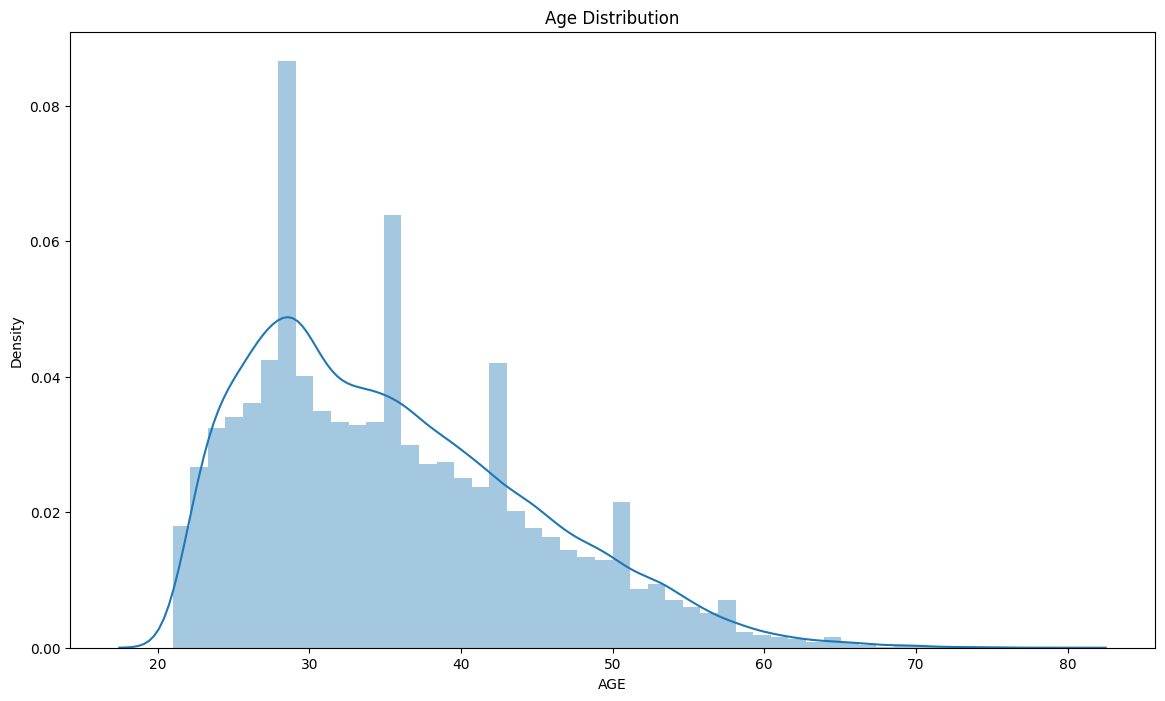

In [344]:
# visiluise the age group in order to see if there is any pattern
# also show the distribution of the age
plt.figure(figsize=(14, 8))
plt.title('Age Distribution')
sns.distplot(df['AGE'])
plt.show()

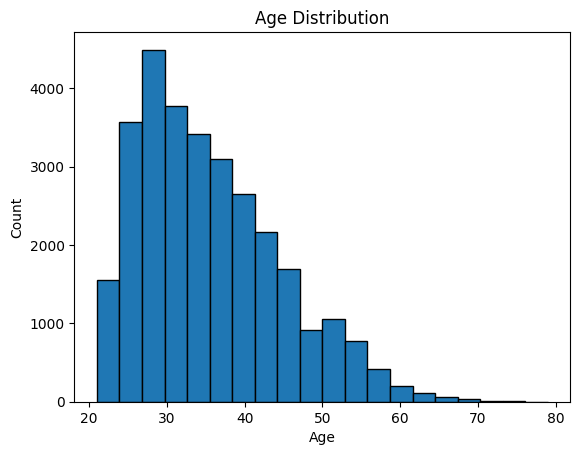

In [345]:
plt.hist(df['AGE'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

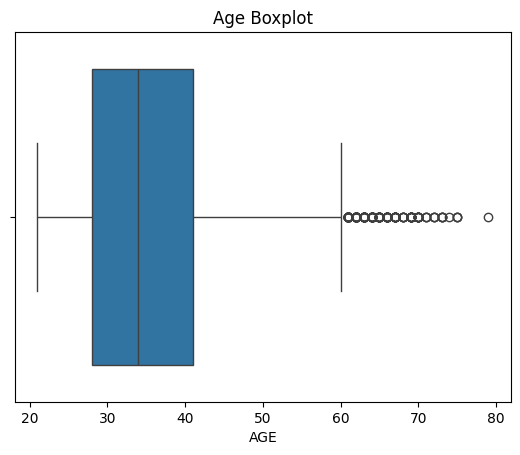

In [346]:
sns.boxplot(x=df['AGE'])
plt.title('Age Boxplot')
plt.show()

In [347]:
def clustering_age_group(df: pd.DataFrame) -> None:
    df_experiment = df.copy()
    scaler = StandardScaler()
    age_scaled = scaler.fit_transform(df_experiment[['AGE']])
    
    # Experiment with DBSCAN for eps=0.1 and min_samples=5
    dbscan = DBSCAN(eps=0.1, min_samples=5)
    clusters = dbscan.fit_predict(age_scaled)
    df_experiment['age_cluster_dbscan'] = clusters
    
    # Experiment with K-means for 5 clusters
    k = 5
    kmeans = KMeans(n_clusters=k, random_state=33)
    df_experiment['age_cluster_k'] = kmeans.fit_predict(age_scaled)
    
   # Plotting the results
    plt.figure(figsize=(8, 8))

    # K-Means Clustering plot
    scatter_kmeans = plt.scatter(df_experiment['AGE'], [1] * len(df_experiment), 
                                c=df_experiment['age_cluster_k'], cmap='viridis', 
                                alpha=0.6, edgecolor='k', s=50, label='K-Means Clustering')

    # DBSCAN Clustering plot
    scatter_dbscan = plt.scatter(df_experiment['AGE'], [0] * len(df_experiment), 
                                c=df_experiment['age_cluster_dbscan'], cmap='Accent', 
                                alpha=0.6, edgecolor='k', s=50, label='DBSCAN Clustering')

    # Customizing the plot to look more professional
    plt.title('Age Clustering: K-Means vs DBSCAN', fontsize=16, fontweight='bold')
    plt.xlabel('Age', fontsize=14, fontweight='bold')
    plt.xticks(fontsize=12)
    plt.yticks([])
    plt.grid(True, which='major', linestyle='--', linewidth=0.5)
    plt.legend(handles=[scatter_kmeans, scatter_dbscan], loc='upper right', fontsize=12)
    plt.tight_layout()
    
    # Show plot
    plt.show()
    return None

/Users/vincentzhao/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


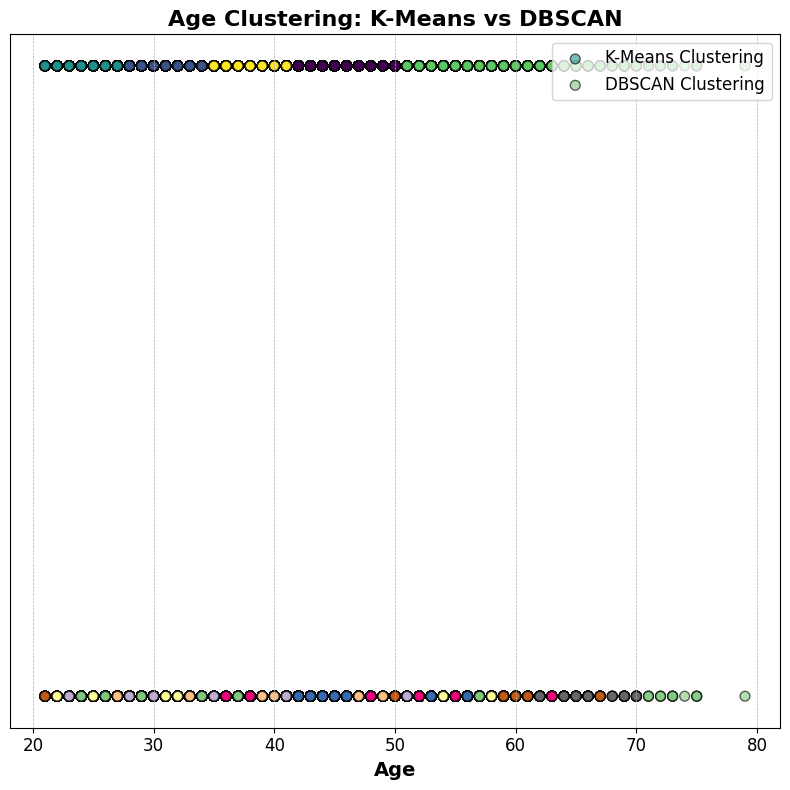

In [348]:
clustering_age_group(df)

In [349]:
def cluster_group(df, min_k, max_k, target='AGE'):
    features_for_clustering = df[[target]]
    scaler = StandardScaler()
    features_for_clustering = scaler.fit_transform(features_for_clustering)
    best_score = -1
    best_k = 1
    for k in range(min_k, max_k + 1):
        kmeans = KMeans(n_clusters=k, random_state=33)
        new_col = target.lower() + '_cluster_k'
        df[new_col] = kmeans.fit_predict(features_for_clustering)
        score = silhouette_score(features_for_clustering, df[new_col])
        if score > best_score:
            best_score = score
            best_k = k
    best_kmeans = KMeans(n_clusters=best_k, random_state=33)
    df[new_col] = best_kmeans.fit_predict(features_for_clustering)
    return df

multicollinearly

In [350]:
labeled_features = ["EDUCATION","Repayment_Status_Sept", "Repayment_Status_Aug", "Repayment_Status_Jul", "Repayment_Status_Jun", "Repayment_Status_May", "Repayment_Status_Apr"]
numerical_features = ['LIMIT_BAL', 'AGE', 'Bill_Amount_Sept', 'Bill_Amount_Aug', 'Bill_Amount_Jul', 'Bill_Amount_Jun', 'Bill_Amount_May', 'Bill_Amount_Apr', 'Pay_Amount_Sept', 'Pay_Amount_Aug', 'Pay_Amount_Jul', 'Pay_Amount_Jun', 'Pay_Amount_May', 'Pay_Amount_Apr']
catory_features = ["MARRIAGE",'SEX']
target = ['Default_Payment']

features = labeled_features + numerical_features + catory_features

# Create new features: Bill_Amount_Total, Pay_Amount_Total, Bill_Amount_Average, Pay_Amount_Average

df = cluster_group(df,5,10, target='LIMIT_BAL')
df['Bill_Amount_Total'] = df['Bill_Amount_Sept'] + df['Bill_Amount_Aug'] + df['Bill_Amount_Jul'] + df['Bill_Amount_Jun'] + df['Bill_Amount_May'] + df['Bill_Amount_Apr']
df['Pay_Amount_Total'] = df['Pay_Amount_Sept'] + df['Pay_Amount_Aug'] + df['Pay_Amount_Jul'] + df['Pay_Amount_Jun'] + df['Pay_Amount_May'] + df['Pay_Amount_Apr']

df['Bill_Amount_Average'] = df['Bill_Amount_Total'] / 6
df = cluster_group(df,5,10, target='Bill_Amount_Average')

df['Pay_Amount_Average'] = df['Pay_Amount_Total'] / 6
df = cluster_group(df,5,10, target='Pay_Amount_Average')

# Create new features: Repayment_Status_Total, Repayment_Status_Average

df["Repayment_Status_Total"] = df["Repayment_Status_Sept"] + df["Repayment_Status_Aug"] + df["Repayment_Status_Jul"] + df["Repayment_Status_Jun"] + df["Repayment_Status_May"] + df["Repayment_Status_Apr"]
df["Repayment_Status_Average"] = df["Repayment_Status_Total"] / 6
df = cluster_group(df,5,10, target='Repayment_Status_Average')

# Create new features: Age_Group
df = cluster_group(df,5,10, target='AGE')
# save df:
df.to_csv('../data/clustered_data.csv', index=False)

/Users/vincentzhao/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vincentzhao/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vincentzhao/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/vincentzhao/Library/Python/3.9/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The 